1. Для f(x) = e^(-x^2/2) сделать выборку 10^6 методом Метрополиса

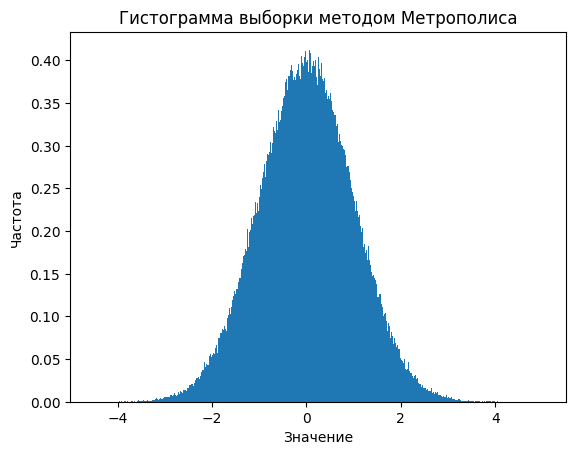

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x**2/2)

def metropolis(iter, cur_x):
    x_sample = [cur_x]

    for _ in range(iter):
        x_new = cur_x + np.random.normal(0, 1) # генерация нового предложенного значения
        ratio = f(x_new) / f(cur_x) # отношение вероятностей
        ksi = np.random.uniform(0, 1)

        # Принятие или отклонение нового значения
        if ksi < ratio:
            cur_x = x_new
        x_sample.append(cur_x)

    return np.array(x_sample)

# Количество итераций
iterations = 10**6

# Начальное значение
init_x = 0

# Генерация выборки методом Метрополиса
sample = metropolis(iterations, init_x)

# Вывод гистограммы выборки
plt.hist(sample, bins=1000, density=True)
# plt.hist(sample)
plt.title('Гистограмма выборки методом Метрополиса')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()


2. С библиотекой SALib провести анализ чувствительности для f(x1,x2,x3) = 10^(-4)*sin(x1+x2)+x3

In [4]:
# !pip install SALib --upgrade

In [5]:
import numpy as np
from SALib.sample import sobol as sobol_sample
from SALib.analyze import sobol as sobol_analyze

def f(x): 
    return 10**(-4)*np.sin(x[:, 0] + x[:, 1]) + x[:, 2]

par = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-np.pi, np.pi], [-np.pi, np.pi], [0, 1]]
}

# Генерация выборки
sample = sobol_sample.sample(par, 1000)
# Вычисление значений функции на сгенерированных наборах параметров
y = f(sample)
# Вычисление индексов чувствительности методом Sobol
sensitive = sobol_analyze.analyze(par, y)

for key, value in sensitive.items():
    print(f"{key}:")
    print(value)
    print()

S1:
[-4.40135627e-07 -1.68418294e-06  9.95048732e-01]

S1_conf:
[2.19025851e-05 2.15343108e-05 7.52539423e-02]

ST:
[6.00409965e-08 6.04216064e-08 9.94714122e-01]

ST_conf:
[5.56347730e-09 4.85572650e-09 5.96367798e-02]

S2:
[[           nan 1.66367816e-06 5.92757348e-07]
 [           nan            nan 3.08117309e-06]
 [           nan            nan            nan]]

S2_conf:
[[           nan 2.91871278e-05 3.35799179e-05]
 [           nan            nan 3.20639012e-05]
 [           nan            nan            nan]]

